# Exploratory Data Analysis - Senior Center Client Data
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import geopandas as gpd
from senior_center_fy2020_data import sccd

In [2]:
sccd.columns

Index(['DFTA ID', 'Service Date', 'Total Daily Services',
       'Total Breakfasts Served', 'Total Lunches Served',
       'Total Dinners Served', 'Total Meals Served', 'Total AIB Services',
       'Total SCE Services', 'Total HPP Services', 'Total Clients Served',
       'Senior Center Name', 'Site Type', 'Borough', 'Meal Prep Type',
       'Meal Prep For Other Centers', 'Total Employees',
       'Client to Staff Ratio', 'PTE Status', 'Service Month',
       'Service Month as Num', 'Service Day of Week', 'Fiscal Quarter'],
      dtype='object')

In [6]:
# Get the sample size (n) for each grouping variable
for col in ['Service Month', 'Service Day of Week', 'Fiscal Quarter', 'Site Type', 'Borough', 'Meal Prep Type', 'Meal Prep For Other Centers', 'PTE Status']:
    print(f'{sccd.value_counts(col)}\n')

Service Month
July 2019         5963
August 2019       5921
October 2019      5797
January 2020      5772
December 2019     5641
September 2019    5384
March 2020        5355
February 2020     5240
November 2019     5198
June 2020         5159
April 2020        4383
May 2020          4361
dtype: int64

Service Day of Week
Tuesday      12935
Friday       12465
Wednesday    12404
Thursday     12368
Monday       12055
Saturday      1110
Sunday         837
dtype: int64

Fiscal Quarter
Q1    17268
Q2    16636
Q3    16367
Q4    13903
dtype: int64

Site Type
Neighborhood Senior Centers    59137
Innovative Senior Centers       4538
Senior Center                    499
dtype: int64

Borough
Brooklyn         21030
Manhattan        16857
Queens           12646
Bronx            11080
Staten Island     2561
dtype: int64

Meal Prep Type
Meal Prep On-Site    35504
Catered              23053
Both                  2971
Not Applicable        2646
dtype: int64

Meal Prep For Other Centers
No     53941
Ye

---
# Generating a quick-and-dirty correlation matrix to see what numerical variables might be related

In [4]:
numeric_cols = ['Total Daily Services', 'Total Breakfasts Served', 'Total Lunches Served',
       'Total Dinners Served', 'Total Meals Served', 'Total AIB Services',
       'Total SCE Services', 'Total HPP Services', 'Total Clients Served']

# Compute a correlation matrix and assign to corr_matrix
corr_matrix = sccd[numeric_cols].corr('pearson')

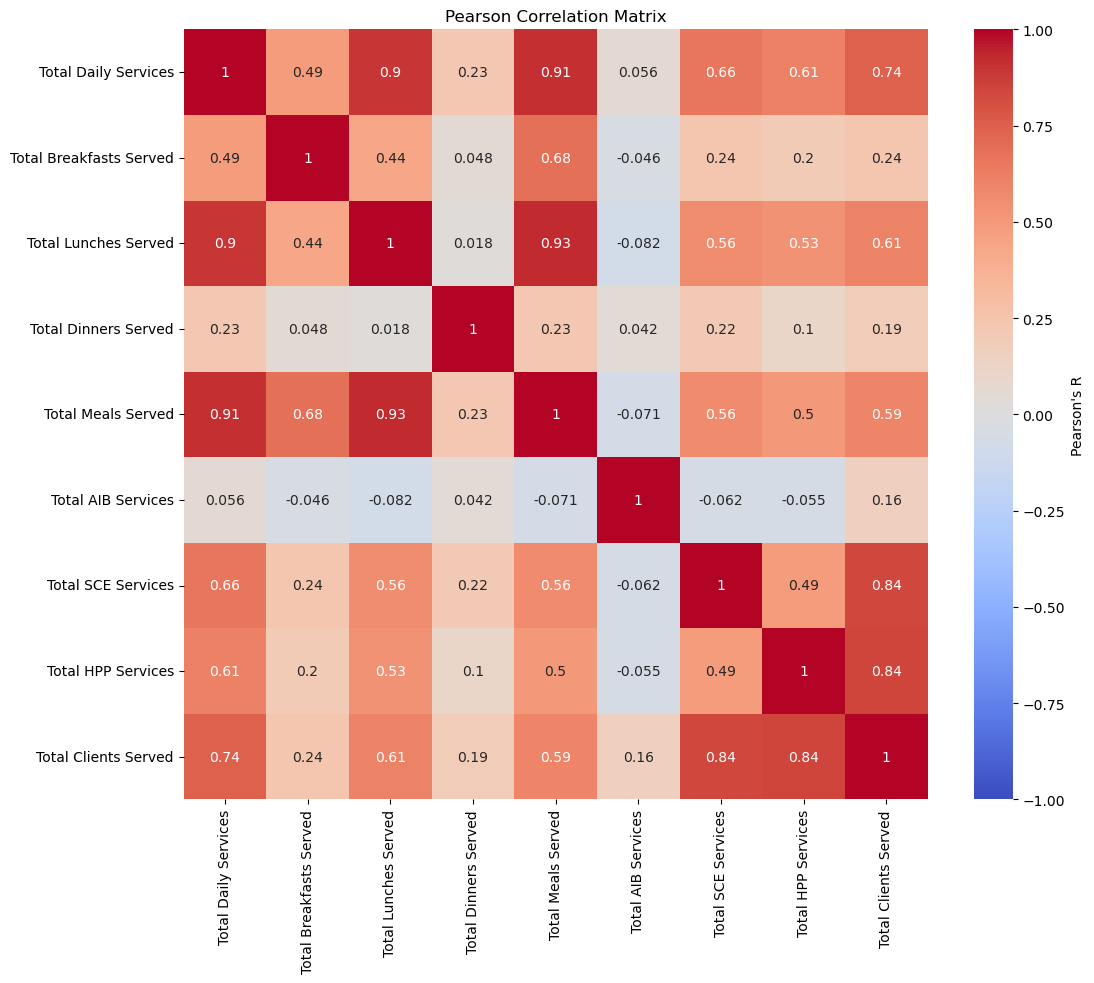

In [5]:
# Plot a heatmap from corr_matrix
plt.figure(figsize = (12, 10))

sns.heatmap(corr_matrix, vmin = -1.0, vmax = 1.0, annot = True, cmap = 'coolwarm',
            cbar_kws = {
                'label': 'Pearson\'s R',
                'orientation': 'vertical'
            }).set(title = 'Pearson Correlation Matrix')

plt.show()

---
# Grouping by Borough

## What is the total instances of service (i.e. annual count of meal services, AIB, SCE, & HPP services, and other services combined) for each borough?

In [19]:
total_services_df = sccd.groupby('Borough')['Total Daily Services'].sum()
total_services_df

Borough
Bronx             776310
Brooklyn         1619225
Manhattan        1587300
Queens           1293041
Staten Island     213178
Name: Total Daily Services, dtype: int64

## What is the total number of clients served (i.e. annual client count) for each borough?

In [25]:
total_clients_df = sccd.groupby('Borough')['Total Clients Served'].sum()
total_clients_df

Borough
Bronx            437020
Brooklyn         906112
Manhattan        740499
Queens           689310
Staten Island    142972
Name: Total Clients Served, dtype: int64

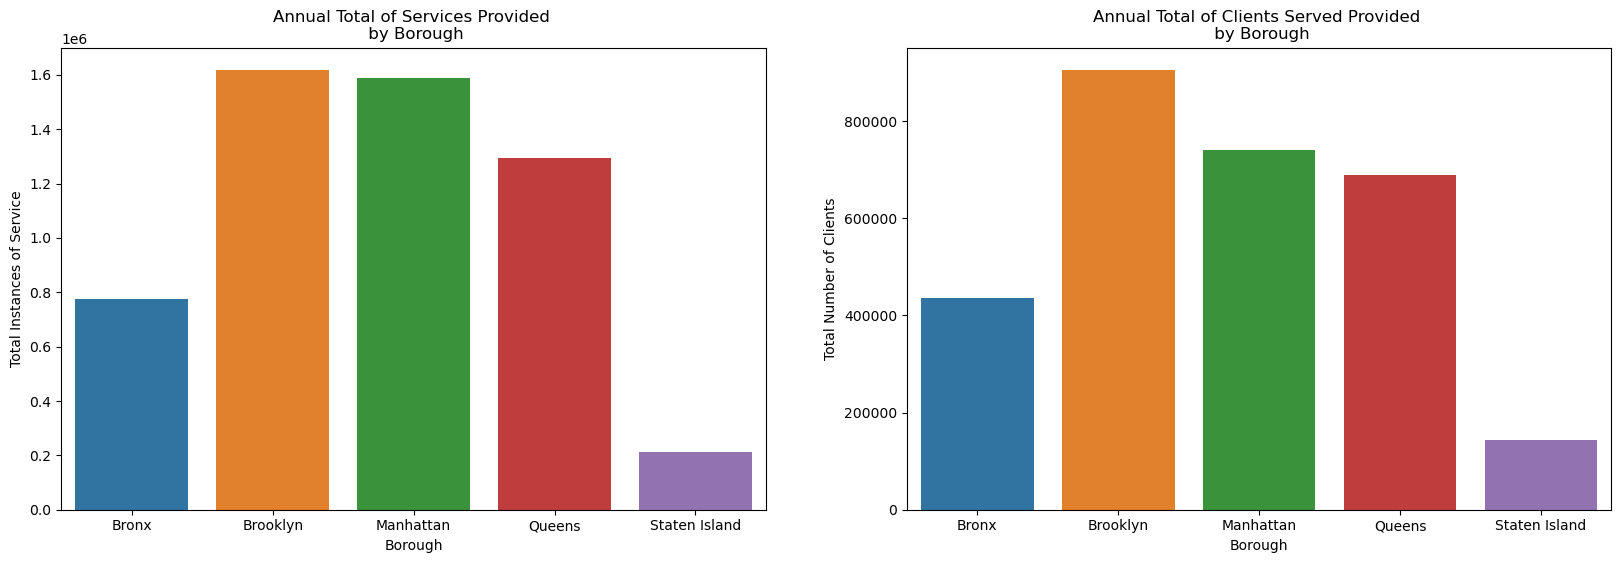

In [31]:
# Create figure for annual services and annual clients
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.barplot(x = total_services_df.index, y = total_services_df.values).set(title = 'Annual Total of Services Provided \n by Borough', ylabel = 'Total Instances of Service')

plt.subplot(1, 2, 2)
sns.barplot(x = total_clients_df.index, y = total_clients_df.values).set(title = 'Annual Total of Clients Served Provided \n by Borough', ylabel = 'Total Number of Clients')

plt.show()

## What is the total number of meals served (i.e. annual meal count) for each borough?

In [27]:
total_meals_df = sccd.groupby('Borough')['Total Meals Served'].sum()
total_meals_df

Borough
Bronx             687533
Brooklyn         1441437
Manhattan        1316693
Queens            954535
Staten Island     201532
Name: Total Meals Served, dtype: int64

## What is the total number of AIB services (i.e. Assistance, Information and Benefits) for the year by borough?

In [28]:
total_aib_df = sccd.groupby('Borough')['Total AIB Services'].sum()
total_aib_df

Borough
Bronx             38812
Brooklyn         104044
Manhattan        112179
Queens            67045
Staten Island     10307
Name: Total AIB Services, dtype: int64

## What is the total number of SCE services (i.e. Education, Recreation, Technology) for the year by borough?

In [29]:
total_sce_df = sccd.groupby('Borough')['Total SCE Services'].sum()
total_sce_df

Borough
Bronx            215970
Brooklyn         398123
Manhattan        341392
Queens           304907
Staten Island     65786
Name: Total SCE Services, dtype: int64

## What is the total number of HPP services (i.e.  Health Promotion (Evidence-Based and Non-Evidence-Based)) for the year by borough?

In [30]:
total_hpp_df = sccd.groupby('Borough')['Total HPP Services'].sum()
total_hpp_df

Borough
Bronx            182238
Brooklyn         403945
Manhattan        286928
Queens           317358
Staten Island     66879
Name: Total HPP Services, dtype: int64

In [43]:
# Combine dataframes for total meal, AIB, SCE, and HPP services into one dataframe
total_subtype_services_df = pd.concat([total_meals_df, total_aib_df, total_sce_df, total_hpp_df], axis = 1)
total_subtype_services_df = total_subtype_services_df.rename(columns = {
    'Total Meals Served': 'Meals',
    'Total AIB Services': 'Assistance, Info, & Benefits',
    'Total SCE Services': 'Education, Recreation, & Tech',
    'Total HPP Services': 'Health Promotion'
})
total_subtype_services_df

,Meals,"Assistance, Info, & Benefits","Education, Recreation, & Tech",Health Promotion
Borough,,,,
Bronx,687533,38812,215970,182238
Brooklyn,1441437,104044,398123,403945
Manhattan,1316693,112179,341392,286928
Queens,954535,67045,304907,317358
Staten Island,201532,10307,65786,66879


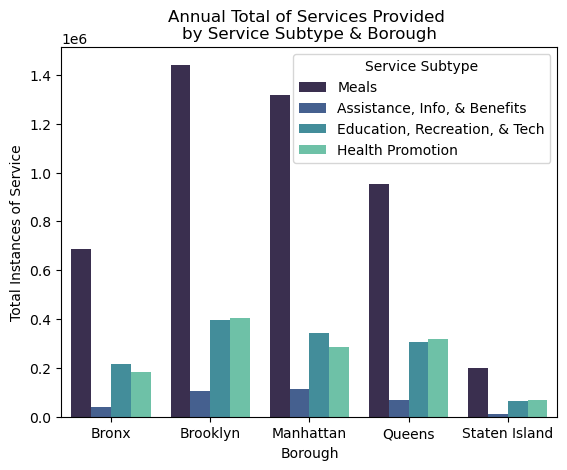

In [48]:
# Create melted dataframe that reshapes data so columns are combined into a single 'Total Instances of Service' column
melted_df = total_subtype_services_df.reset_index().melt(id_vars = 'Borough', var_name = 'Service Subtype', value_name = 'Total Instances of Service')
melted_df

# Create plot of combined services
sns.barplot(melted_df, x = 'Borough', y = 'Total Instances of Service',
            hue = 'Service Subtype', palette = 'mako').set(title = 'Annual Total of Services Provided \nby Service Subtype & Borough')
plt.show()